In [10]:
import pandas as pd
import numpy as np
import datetime
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("Passengers.csv",usecols=[1])
df.head()
df = df.astype('int64')

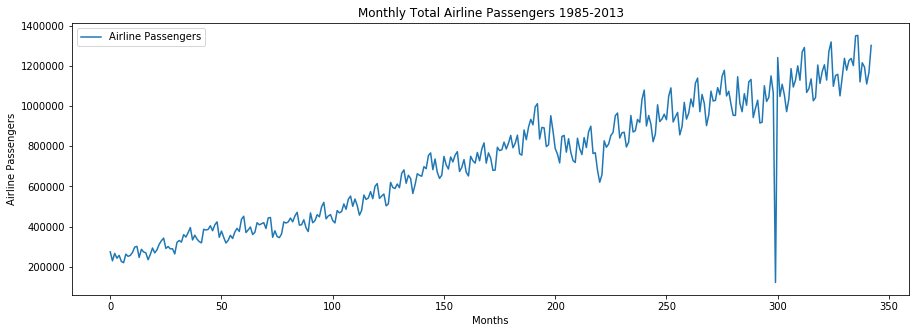

In [20]:
plt.figure(figsize = (15, 5))
plt.plot(df, label = "Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Airline Passengers")
plt.title("Monthly Total Airline Passengers 1985-2013")
plt.legend()
plt.show()

In [21]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.stattools import acf,pacf

In [22]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [23]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

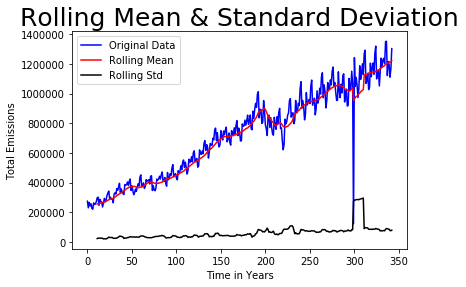

In [24]:
TestStationaryPlot(df)

In [25]:
df = df.dropna()
TestStationaryAdfuller(df.iloc[:,0])

Test Statistic                  -0.138803
p-value                          0.945434
#Lags Used                      11.000000
Number of Observations Used    331.000000
Critical Value (1%)             -3.450262
Critical Value (5%)             -2.870312
Critical Value (10%)            -2.571443
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


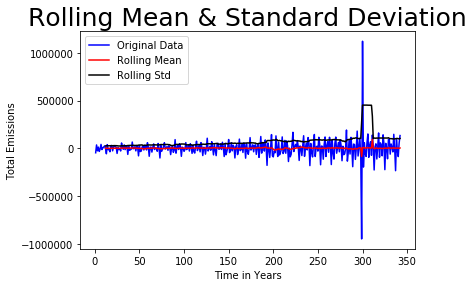

Test Statistic                -1.142099e+01
p-value                        6.874571e-21
#Lags Used                     1.000000e+01
Number of Observations Used    3.310000e+02
Critical Value (1%)           -3.450262e+00
Critical Value (5%)           -2.870312e+00
Critical Value (10%)          -2.571443e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [26]:
df_first_difference = df - df.shift(1)  
TestStationaryPlot(df_first_difference.dropna(inplace=False))
df_first_difference = df_first_difference.dropna()
TestStationaryAdfuller(df_first_difference.iloc[:,0])

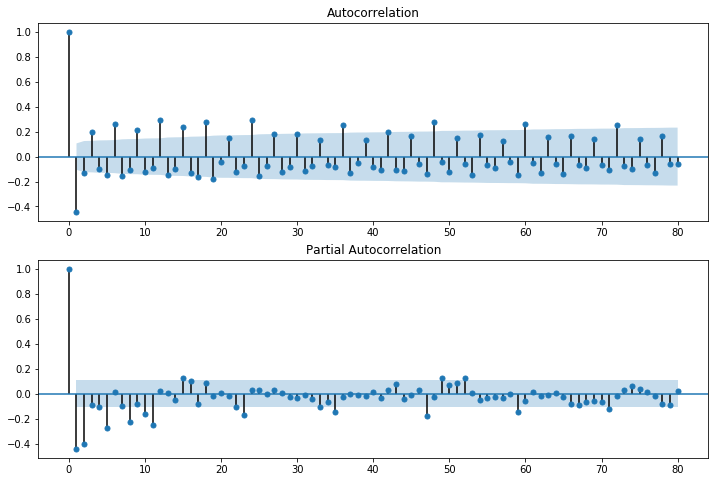

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_first_difference.dropna(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_first_difference.dropna(), lags=80, ax=ax2)

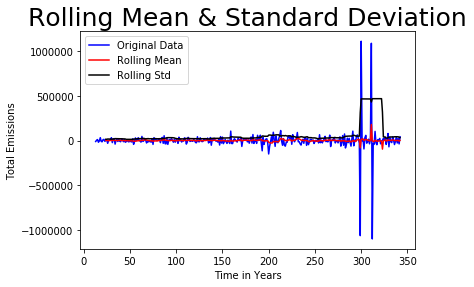

In [28]:
diff12 = df_first_difference - df_first_difference.shift(12)  
TestStationaryPlot(diff12.dropna(inplace=False))

/home/harsha/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


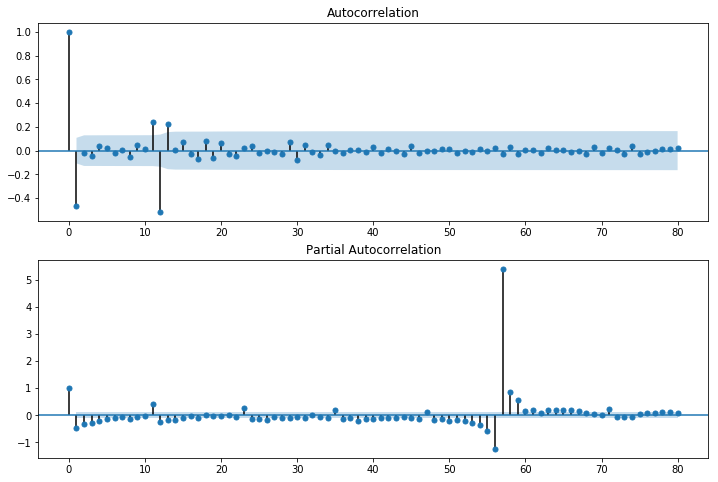

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff12.dropna(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff12.dropna(), lags=80, ax=ax2)

In [30]:
TestStationaryAdfuller(diff12.iloc[:,0].dropna())

Test Statistic                -7.255687e+00
p-value                        1.733352e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.150000e+02
Critical Value (1%)           -3.451281e+00
Critical Value (5%)           -2.870760e+00
Critical Value (10%)          -2.571682e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [31]:
ts = pd.read_csv("Passengers.csv")
ts.head()

,Date,Total
0,1985-01-01 00:00:00.000000,274147
1,1985-02-01 00:00:00.000000,229487
2,1985-03-01 00:00:00.000000,266581
3,1985-04-01 00:00:00.000000,242438
4,1985-05-01 00:00:00.000000,256786


In [32]:
ts = ts.dropna()
ts.reset_index(inplace=True)
ts['Date'] = pd.to_datetime(ts['Date'])
ts = ts.set_index('Date')
ts = ts.drop(['index'],axis=1)
ts.head()

,Total
Date,
1985-01-01,274147
1985-02-01,229487
1985-03-01,266581
1985-04-01,242438
1985-05-01,256786


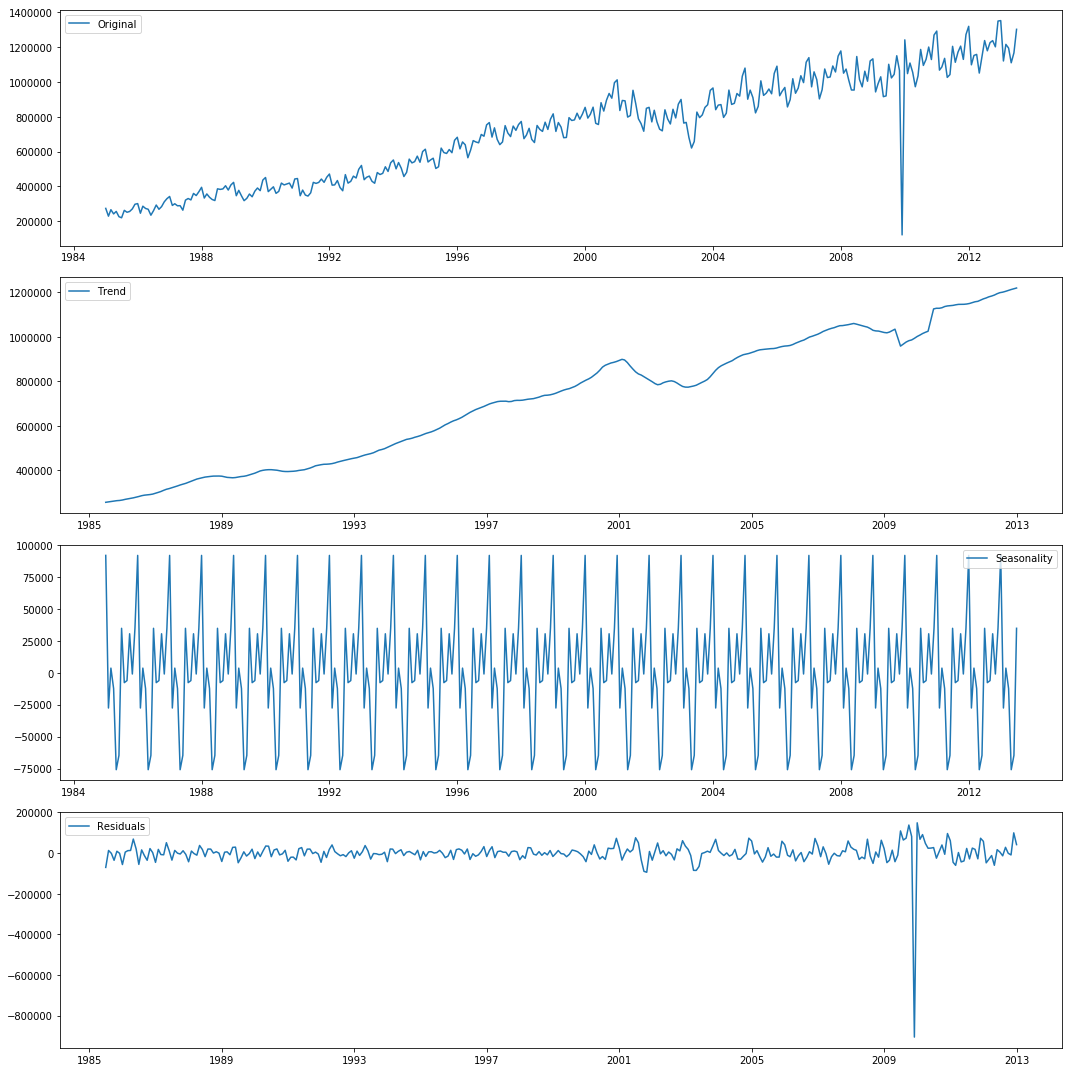

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig,ax = plt.subplots()
fig.set_size_inches(15,15)
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

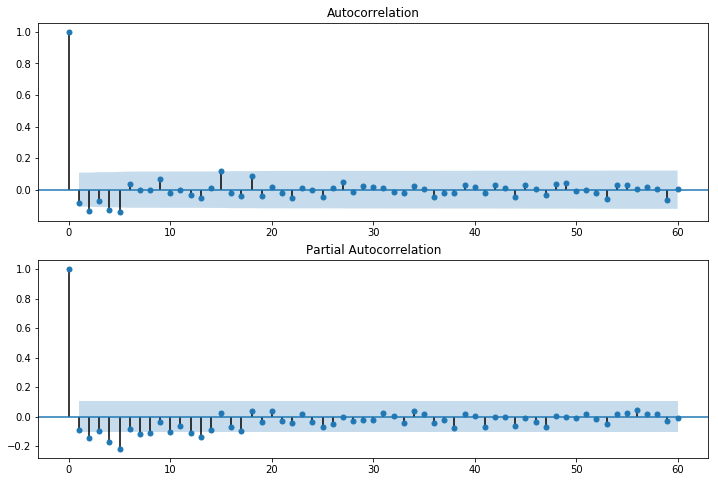

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residual.iloc[:,0].dropna(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residual.iloc[:,0].dropna(), lags=60, ax=ax2)

In [ ]:
TestStationaryAdfuller(residual.iloc[:,0].dropna())

In [35]:
mod = sm.tsa.statespace.SARIMAX(ts.iloc[:,0].dropna(), 
                                order=(0,1,1), 
                                seasonal_order=(0,1,0,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/home/harsha/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  343
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood               -4234.227
Date:                            Fri, 19 Apr 2019   AIC                           8472.454
Time:                                    20:30:04   BIC                           8480.040
Sample:                                01-01-1985   HQIC                          8475.481
                                     - 07-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8222      0.019    -42.854      0.000      -0.860      -0.785
sigma2      1.037e+10   3.06e-13   

/home/harsha/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


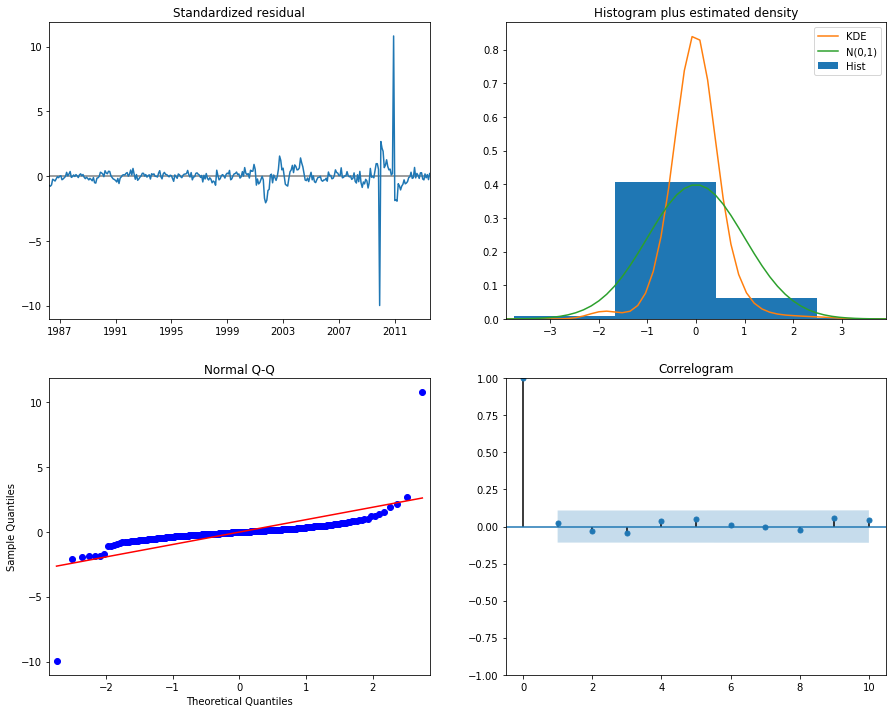

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [37]:
pred = results.get_prediction(start = 324, end = 342, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Total,upper Total
2012-01-01,1.130722e+06,1.529870e+06
2012-02-01,9.045641e+05,1.303713e+06
2012-03-01,9.221771e+05,1.321326e+06
2012-04-01,9.766151e+05,1.375764e+06
2012-05-01,8.641331e+05,1.263282e+06


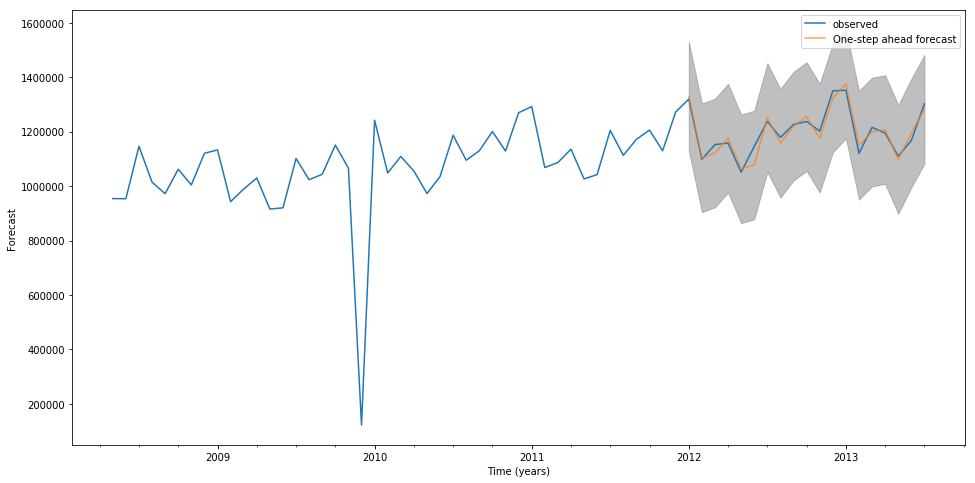

In [38]:
fig,axi = plt.subplots() 
fig.set_size_inches(16,8)
ax = ts.iloc[280:,0].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Forecast')
plt.legend()

plt.show()

In [39]:
mte_forecast = pred.predicted_mean
mte_truth = ts.iloc[324:,0]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_truth))))
mte_mean = mte_truth.mean()
print('The Normalised Root Mean Square Error (NRMSE) of the forcast: {:.4f}'
      .format((np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_truth))/mte_mean)))

The Mean Squared Error (MSE) of the forecast is 617864761.09
The Root Mean Square Error (RMSE) of the forcast: 24856.8856
The Normalised Root Mean Square Error (NRMSE) of the forcast: 0.0207


In [41]:
print(mte_forecast)
mte_forecast.to_csv('forecast_arima.csv')

2012-01-01    1.330296e+06
2012-02-01    1.104138e+06
2012-03-01    1.121752e+06
2012-04-01    1.176190e+06
2012-05-01    1.063707e+06
2012-06-01    1.077525e+06
2012-07-01    1.251912e+06
2012-08-01    1.157819e+06
2012-09-01    1.220350e+06
2012-10-01    1.255525e+06
2012-11-01    1.176175e+06
2012-12-01    1.323407e+06
2013-01-01    1.375328e+06
2013-02-01    1.150269e+06
2013-03-01    1.198771e+06
2013-04-01    1.207830e+06
2013-05-01    1.098297e+06
2013-06-01    1.194873e+06
2013-07-01    1.282314e+06
Freq: MS, dtype: float64


In [42]:
# Get forecast of 3 years or 36 months steps ahead in future
forecast = results.get_forecast(steps= 36)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Total,upper Total
2013-08-01,1.027438e+06,1.426587e+06
2013-09-01,1.071382e+06,1.476789e+06
2013-10-01,1.079696e+06,1.491266e+06
2013-11-01,1.040974e+06,1.458617e+06
2013-12-01,1.186032e+06,1.609660e+06


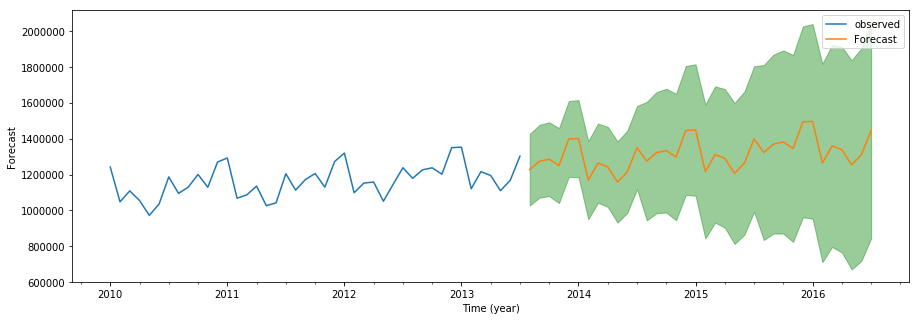

In [43]:
ax = ts.iloc[300:,0].plot(label='observed', figsize=(15,5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Forecast')

plt.legend()
plt.show()

In [44]:
seasonal.head()
#seasonal.to_csv('Seasonal_Values.csv',index=False)

,Total
Date,
1985-01-01,91738.869094
1985-02-01,-27615.150472
1985-03-01,3586.787799
1985-04-01,-12386.064052
1985-05-01,-75855.783188


In [53]:
ans = pd.read_csv('forecast_Holtz.csv')
from sklearn import preprocessing
x = ans.values
print(x)
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0.1,1))
x_scaled = min_max_scaler.fit_transform(x)
ans_nom = pd.DataFrame(x_scaled)

[[1319684]
 [1098688]
 [1152453]
 [1158448]
 [1051239]
 [1145681]
 [1237999]
 [1179114]
 [1226187]
 [1237582]
 [1201897]
 [1349947]]


/home/harsha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
ans_nom.head(12)

,0
0,0.908818
1,0.242963
2,0.404955
3,0.423018
4,0.100000
5,0.384551
6,0.662703
7,0.485284
8,0.627114
9,0.661447


In [56]:
# df = pd.read_csv('forecast_Holtz.csv')
# dx = pysql("SELECT sum(Normalised) from df")
# dx.head()

,sum(Normalised)
0,6.454782


In [57]:
df['Ratio'] = df['val']/14358919
df.head()
df.to_csv('forecast_Holtz.csv',index=False)

In [59]:
dk = pd.read_csv('Seasonal_Values.csv')
dk['Pos'] = dk['Total'] + 91738.8690935479
print(dk['Pos'].sum())

1100866.4291225746


In [60]:
dk['Ratio'] = dk['Pos']/1100866.4291225746
dk.to_csv('Seasonal_Values.csv')